Levanto librerias y funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth
from scipy.integrate import quad
from math import* # import all function from math

## Serie de Fourier

Ejemplo de construccion de una senal utilizando la serie de Fourier

### Forma compleja
$f(x) = \sum_{k=-\infty}^{\infty} F_k \mathrm{e}^{jk\omega_0t}$  

$ F_k = \frac{1}{\pi} \int_{-\pi}^\pi f(x)\mathrm{e}^{-jk\omega_0t}\mathrm{d}t $

### Forma trigonometrica

$ f(x) = \frac{A_0}{2} + \sum_{k=1}^{\infty} (A_k cos(\frac{2\pi k\omega_0t}{L} + B_k sin(\frac{2\pi k\omega_0t}{L})) $

$ A_0 = \frac{1}{\pi} \int_{-\pi}^\pi f(x)\mathrm{d}x $

$ A_k= \frac{1}{\pi} \int_{-\pi}^\pi f(x)*cos(k\omega_0t)\mathrm{d}x $

$ B_k= \frac{1}{\pi} \int_{-\pi}^\pi f(x)*sin(k\omega_0t)\mathrm{d}x $

In [2]:
#Defino un vector x entre –π to +π
t=np.arange(-3*np.pi,3*np.pi,0.001) 

# Genera una senal cuadrada utilizando scipy
#y=square(t) 
#Funciones utilizadas para el calculo de An y Bn
#fc=lambda t:square(t)*cos(i*t)  #i :dummy index
#fs=lambda t:square(t)*sin(i*t)

y = sawtooth(t) 
#Funciones utilziadas para el calculo de An y Bn
fc=lambda t:sawtooth(t)*cos(i*t)  #i :dummy index
fs=lambda t:sawtooth(t)*sin(i*t)

#Cantidad de terminos incluidos en la sumatoria
n=100

An=[] #defining array
Bn=[]

sum=0

#Se obtiene el termino An
for i in range(n):
 an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
 An.append(an)

#Se obtiene el termino Bn
for i in range(n):
 bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)
 Bn.append(bn) 

for i in range(n):
 if i==0.0:
    sum=sum+An[i]/2
 else:
    sum=sum+(An[i]*np.cos(i*t)+Bn[i]*np.sin(i*t))

/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_8387/3920190134.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_8387/3920190134.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splittin

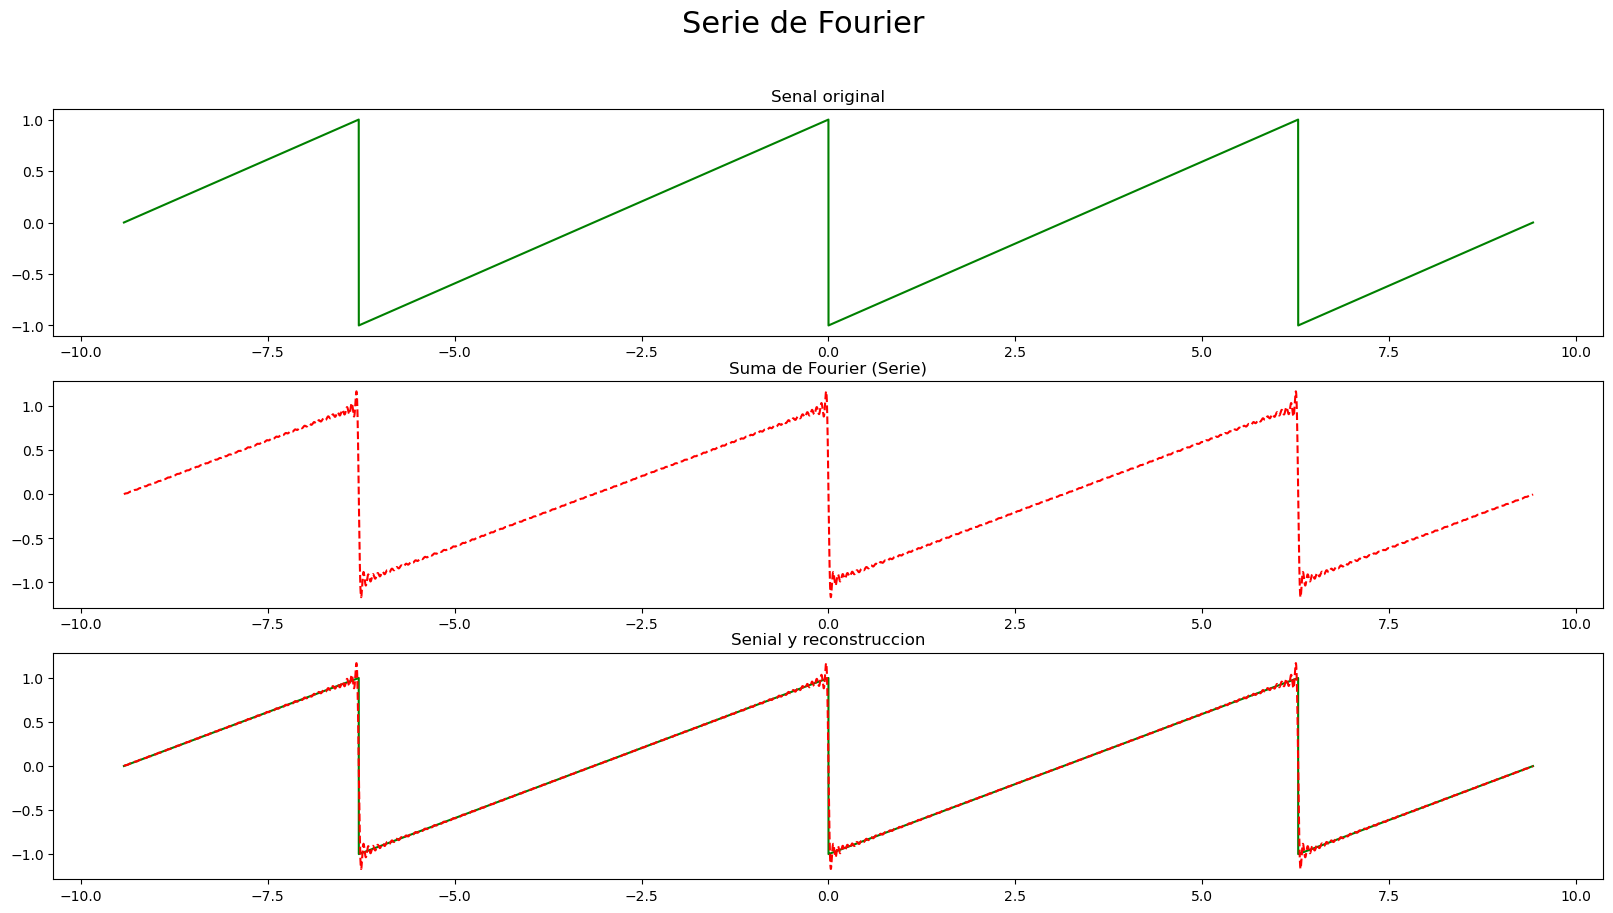

In [3]:
fig, ax = plt.subplots(3,1)
fig.suptitle('Serie de Fourier', fontsize=22)
fig.set_size_inches(20, 10)
ax[0].plot(t,y,'g')
ax[0].set_title("Senal original")
ax[1].plot(t,sum,'r--')
ax[1].set_title("Suma de Fourier (Serie)")
ax[2].plot(t,y,'g')
ax[2].plot(t,sum,'r--')
ax[2].set_title("Senial y reconstruccion")
plt.show()

c:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
c:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
c:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument

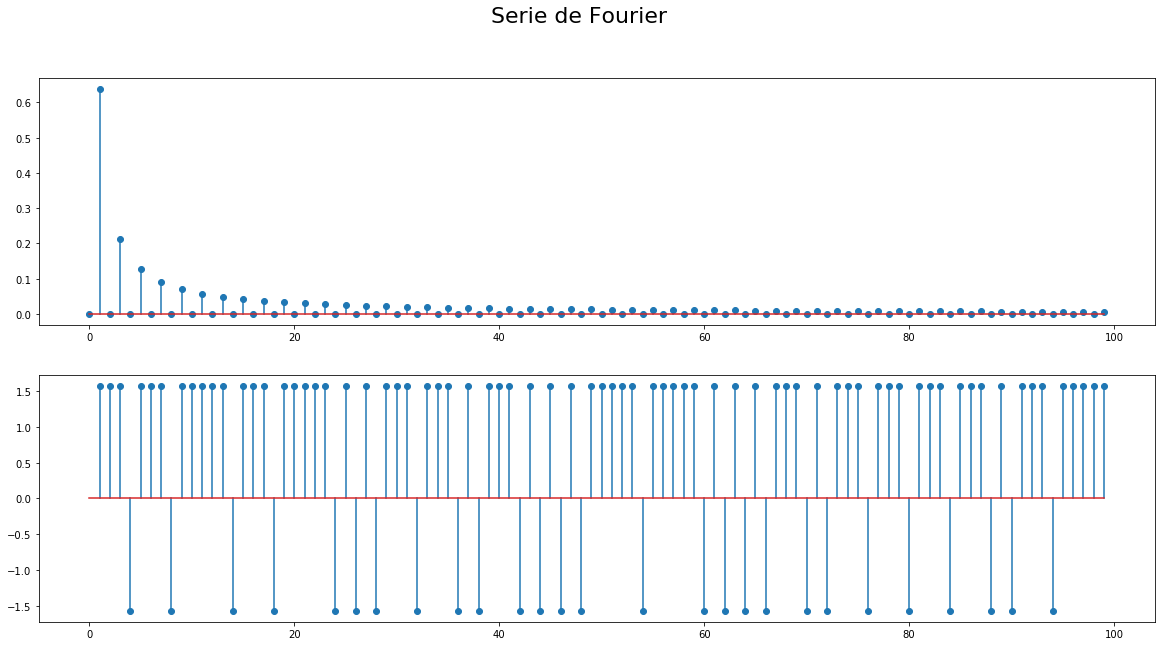

In [10]:
Xn_modulo = np.sqrt(np.power(np.array(An)/2,2) + np.power(np.array(Bn)/2,2))
Xn_fase = np.arctan(np.array(Bn)/np.array(An)) 

fig, ax = plt.subplots(2,1)
fig.suptitle('Serie de Fourier', fontsize=22)
fig.set_size_inches(20, 10)
ax[0].stem(Xn_modulo)
#ax[0].set_title("Senal original")
ax[1].stem(Xn_fase)
#ax[1].set_title("Suma de Fourier (Serie)")
#ax[2].plot(t,y,'g')
#ax[2].plot(t,sum,'r--')
#ax[2].set_title("Senial y reconstruccion")
plt.show()